## 지수 병합

In [19]:
import pandas as pd

pd.set_option('display.max_columns', None)

cpi_df = pd.read_csv('./data/소비자물가지수.csv', encoding='CP949')
rsi_df = pd.read_csv('./data/소매판매지수.csv')
mir_df = pd.read_csv('./data/시장금리.csv', encoding='CP949')

### 소비자물가지수 전처리

In [20]:
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      116 non-null    float64
 1   전국      116 non-null    float64
dtypes: float64(2)
memory usage: 1.9 KB


In [21]:
cpi_df["시점"] = cpi_df["시점"].astype(str)                                                                 # 데이터 타입 str로 변경
cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"   # 10월이 .1로 입력돼있기 때문에 0을 붙여준다.
cpi_df["시점"] = pd.to_datetime(cpi_df["시점"], format='%Y.%m')                                             # 데이터 타입 datetime으로 변경
cpi_df["시점"] = cpi_df["시점"].dt.strftime('%Y%m')                                                         # datetime 형식 설정
cpi_df.rename(columns={"시점":"날짜"}, inplace=True)                                                       # 컬럼명 변경
cpi_df.rename(columns={"전국":"소비자물가지수"}, inplace=True)                                              # 컬럼명 변경
cpi_df.set_index("날짜", inplace=True)                                                                     # 날짜 컬럼 인덱스 설정
cpi_df = cpi_df.iloc[:-4]
cpi_df

/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_6387/3175797114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_df["시점"][cpi_df["시점"].str.endswith(".1")] = cpi_df["시점"][cpi_df["시점"].str.endswith(".1")]+"0"   # 10월이 .1로 입력돼있기 때문에 0을 붙여준다.


,소비자물가지수
날짜,
201211,92.011
201212,92.175
201301,92.728
201302,93.038
201303,92.952
...,...
202110,103.350
202111,103.870
202112,104.040


### 소매판매지수 전처리

In [22]:
rsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   날짜             114 non-null    object 
 1   불변_총지수         114 non-null    float64
 2   불변_총지수(승용차제외)  114 non-null    float64
 3   불변_내구재         114 non-null    float64
 4   불변_준내구재        114 non-null    float64
 5   불변_비내구재        114 non-null    float64
 6   계절_총지수         114 non-null    float64
 7   계절_총지수(승용차제외)  114 non-null    float64
 8   계절_내구재         114 non-null    float64
 9   계절_준내구재        114 non-null    float64
 10  계절_비내구재        114 non-null    float64
 11  불변_인터넷쇼핑       114 non-null    float64
 12  불변_홈쇼핑         114 non-null    float64
 13  불변_방문및배달소매점    114 non-null    float64
dtypes: float64(13), object(1)
memory usage: 12.6+ KB


In [23]:
rsi_df = rsi_df[["날짜", "불변_총지수"]]
rsi_df["날짜"] = pd.to_datetime(rsi_df["날짜"], format='%Y-%m')     # 데이터 타입 datetime으로 변경
rsi_df["날짜"] = rsi_df["날짜"].dt.strftime('%Y%m')                 # datetime 형식 설정
rsi_df.set_index("날짜", inplace=True)                              # 날짜 컬럼 인덱스 설정
rsi_df.rename(columns={"불변_총지수":"소매판매지수"}, inplace=True)  # 컬럼명 변경
rsi_df = rsi_df.iloc[:-2]
rsi_df

,소매판매지수
날짜,
201211,97.5
201212,99.8
201301,91.2
201302,86.8
201303,93.6
...,...
202110,125.0
202111,124.7
202112,127.2


### 시장금리 전처리

In [24]:
mir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Columns: 115 entries, Unnamed: 0 to 202204월
dtypes: float64(114), object(1)
memory usage: 8.2+ KB


In [25]:
mir_df = mir_df.transpose()
mir_df = mir_df.rename(columns=mir_df.iloc[0])
mir_df = mir_df.iloc[1:-2, :7]                
mir_df

,국고채?3년(평균),국고채?5년(평균),국고채?10년(평균),회사채?3년(평균),CD?91물(평균),"콜금리(1일물,평균)",기준금리
201211월,2.8,2.87,2.99,3.32,2.85,2.75,2.75
201212월,2.85,2.98,3.13,3.3,2.88,2.75,2.75
201301월,2.75,2.86,3.05,3.2,2.86,2.76,2.75
201302월,2.7,2.83,3.04,3.06,2.83,2.75,2.75
201303월,2.6,2.69,2.91,2.95,2.81,2.74,2.75
...,...,...,...,...,...,...,...
202110월,1.84,2.15,2.4,2.3,1.08,0.74,0.75
202111월,1.95,2.17,2.36,2.49,1.17,0.8,1.0
202112월,1.8,1.98,2.19,2.41,1.27,1.01,1.0
202201월,2.06,2.28,2.49,2.63,1.39,1.19,1.25


In [26]:
mir_df.reset_index(inplace=True)                                        # 인덱스 재설정
mir_df["index"] = pd.to_datetime(mir_df["index"], format='%Y%m월')      # 데이터 타입 datetime으로 변경
mir_df["index"] = mir_df["index"].dt.strftime('%Y%m')                   # datetime 형식 설정
mir_df.rename(columns={"index":"날짜"}, inplace=True)                   # 컬럼명 변경
mir_df.set_index("날짜", inplace=True)                                  # 날짜 컬럼 인덱스 설정
mir_df.columns = mir_df.columns.str.replace("?", " ")                   # 컬럼명 불필요 문자 제거
mir_df.head()

/var/folders/wy/08qctpkd68s3_qyk81fm3w180000gn/T/ipykernel_6387/1137828608.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mir_df.columns = mir_df.columns.str.replace("?", " ")                   # 컬럼명 불필요 문자 제거


,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
날짜,,,,,,,
201211,2.8,2.87,2.99,3.32,2.85,2.75,2.75
201212,2.85,2.98,3.13,3.3,2.88,2.75,2.75
201301,2.75,2.86,3.05,3.2,2.86,2.76,2.75
201302,2.7,2.83,3.04,3.06,2.83,2.75,2.75
201303,2.6,2.69,2.91,2.95,2.81,2.74,2.75


In [27]:
indexes_df = pd.merge(cpi_df, rsi_df, how="left", left_index=True, right_index=True)
indexes_df = pd.merge(indexes_df, mir_df, how="left", left_index=True, right_index=True)
indexes_df.drop_duplicates(inplace=True)
indexes_df

,소비자물가지수,소매판매지수,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
날짜,,,,,,,,,
201211,92.011,97.5,2.8,2.87,2.99,3.32,2.85,2.75,2.75
201212,92.175,99.8,2.85,2.98,3.13,3.3,2.88,2.75,2.75
201301,92.728,91.2,2.75,2.86,3.05,3.2,2.86,2.76,2.75
201302,93.038,86.8,2.7,2.83,3.04,3.06,2.83,2.75,2.75
201303,92.952,93.6,2.6,2.69,2.91,2.95,2.81,2.74,2.75
...,...,...,...,...,...,...,...,...,...
202110,103.350,125.0,1.84,2.15,2.4,2.3,1.08,0.74,0.75
202111,103.870,124.7,1.95,2.17,2.36,2.49,1.17,0.8,1.0
202112,104.040,127.2,1.8,1.98,2.19,2.41,1.27,1.01,1.0


In [29]:
# 지수 데이터프레임 csv로 저장
indexes_df.to_csv('./data/indexes.csv')

### 카드 소비 전처리

In [42]:
card_df = pd.read_excel('/Users/ijunhui/Downloads/ubion/Project1-다줘페이/data/work file_신용카드_분석_컬럼 분리.xlsx', sheet_name='일일 평균 신용카드')
card_df

,날짜,일수,합계,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,종합병원,일반병의원/기타의료기관,자동차,여행/교통,스포츠/오락/여가,서적/문구,교육,숙박,음식점,공과금/개인및전문서비스,금융/보험
0,2012/11,30,9999.011333,972.215000,159.277667,485.776000,1041.974333,302.517667,765.296000,199.357000,565.939000,641.297667,198.789667,348.339667,89.743667,288.156333,70.666333,1039.920667,840.187000,353.962000
1,2012/12,31,10017.194194,966.833226,157.914194,455.321613,989.105161,256.978710,704.016774,186.082258,517.934194,740.329032,206.153548,291.311290,97.125806,272.277419,79.177742,1127.598710,837.021613,339.674516
2,2013/01,31,9572.008710,920.832258,162.089032,384.273548,966.186452,255.210645,798.916129,210.822581,588.093548,511.525806,218.522258,258.110000,90.403226,283.121935,79.291290,1027.478387,983.820000,336.193226
3,2013/02,28,9548.782857,878.453929,196.795714,396.239643,974.585000,275.823929,766.754643,200.041071,566.713571,587.617857,207.593929,242.864643,89.367143,301.121786,65.062500,962.792143,898.198929,339.607143
4,2013/03,31,9536.780000,861.428387,154.043548,423.443548,979.064839,316.493226,753.370000,196.594839,556.775161,649.399677,196.104839,297.237097,118.750000,290.206774,61.232581,1041.879355,824.845484,330.772258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2021/12,31,17417.260645,4258.267742,323.044839,349.118710,969.116774,371.913871,1320.977742,262.184194,1058.793871,966.456774,200.281290,314.451935,95.996774,347.178710,88.156129,1433.026129,1943.300968,777.822581
110,2022/01,31,17593.384516,4245.859355,414.706452,315.169032,950.493548,414.118710,1349.619677,260.785806,1088.833871,750.398387,207.233548,274.594194,91.136452,358.386129,84.651935,1346.140000,2324.192581,723.731935
111,2022/02,28,16796.288571,4251.048929,285.238929,283.359286,940.046429,424.111786,1304.308929,236.276786,1068.032143,829.146786,192.837857,280.063214,84.367143,364.047500,87.029286,1230.901429,1956.601071,760.856429
112,2022/03,31,17398.272581,4346.837742,286.993548,316.113548,1021.516129,399.077419,1365.133548,236.337742,1128.795806,840.082581,219.694194,353.645806,106.896452,364.006452,71.713871,1350.865806,1911.241290,811.151935


In [43]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   날짜            114 non-null    object 
 1   일수            114 non-null    int64  
 2   합계            114 non-null    float64
 3   전자상거래/통신판매    114 non-null    float64
 4   식료품           114 non-null    float64
 5   의류/잡화         114 non-null    float64
 6   연료            114 non-null    float64
 7   가구/가전         114 non-null    float64
 8   의료/보건         114 non-null    float64
 9   종합병원          114 non-null    float64
 10  일반병의원/기타의료기관  114 non-null    float64
 11  자동차           114 non-null    float64
 12  여행/교통         114 non-null    float64
 13  스포츠/오락/여가     114 non-null    float64
 14  서적/문구         114 non-null    float64
 15  교육            114 non-null    float64
 16  숙박            114 non-null    float64
 17  음식점           114 non-null    float64
 18  공과금/개인및전문서비스  114 non-null    

In [44]:
card_df["날짜"] = pd.to_datetime(card_df["날짜"], format='%Y-%m')     # 데이터 타입 datetime으로 변경
card_df["날짜"] = card_df["날짜"].dt.strftime('%Y%m')                 # datetime 형식 설정

In [48]:
card_df = card_df.drop('일수', axis = True)

In [50]:
card_df.columns

Index(['날짜', '합계', '전자상거래/통신판매', '식료품', '의류/잡화', '연료', '가구/가전', '의료/보건',
       '종합병원', '일반병의원/기타의료기관', '자동차', '여행/교통', '스포츠/오락/여가', '서적/문구', '교육',
       '숙박', '음식점', '공과금/개인및전문서비스', '금융/보험'],
      dtype='object')

1. 온/오프라인 구분
온라인: 전자상거래/통신판매
오프라인 : 그 외 전체
2. 소모품 구분
내구재 : 자동차, 가구/가전
준내구재 : 의류/잡화, 스포츠/오락/여가
비내구재 : 식료품, 연료
3. 서비스 상품 구분
전국_여행/교통
전국_ 숙박
전국_ 음식점
전국_공과금/개인 및 전문 서비스
전국_금융/보험
교육/서적/문구 (신규)
전국_의료/보건

In [57]:
# 사용할 컬럼(카테고리) 추출

category_df = card_df[['날짜', '전자상거래/통신판매', '가구/가전', '의류/잡화', '스포츠/오락/여가', '식료품', '연료', 
                       '여행/교통', '숙박', '음식점', '서적/문구', '교육', '의료/보건', '자동차', '공과금/개인및전문서비스', 
                       '금융/보험']]
category_df = pd.DataFrame(category_df)
category_df

,날짜,전자상거래/통신판매,가구/가전,의류/잡화,스포츠/오락/여가,식료품,연료,여행/교통,숙박,음식점,서적/문구,교육,의료/보건,자동차,공과금/개인및전문서비스,금융/보험
0,201211,972.215000,302.517667,485.776000,348.339667,159.277667,1041.974333,198.789667,70.666333,1039.920667,89.743667,288.156333,765.296000,641.297667,840.187000,353.962000
1,201212,966.833226,256.978710,455.321613,291.311290,157.914194,989.105161,206.153548,79.177742,1127.598710,97.125806,272.277419,704.016774,740.329032,837.021613,339.674516
2,201301,920.832258,255.210645,384.273548,258.110000,162.089032,966.186452,218.522258,79.291290,1027.478387,90.403226,283.121935,798.916129,511.525806,983.820000,336.193226
3,201302,878.453929,275.823929,396.239643,242.864643,196.795714,974.585000,207.593929,65.062500,962.792143,89.367143,301.121786,766.754643,587.617857,898.198929,339.607143
4,201303,861.428387,316.493226,423.443548,297.237097,154.043548,979.064839,196.104839,61.232581,1041.879355,118.750000,290.206774,753.370000,649.399677,824.845484,330.772258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,202112,4258.267742,371.913871,349.118710,314.451935,323.044839,969.116774,200.281290,88.156129,1433.026129,95.996774,347.178710,1320.977742,966.456774,1943.300968,777.822581
110,202201,4245.859355,414.118710,315.169032,274.594194,414.706452,950.493548,207.233548,84.651935,1346.140000,91.136452,358.386129,1349.619677,750.398387,2324.192581,723.731935
111,202202,4251.048929,424.111786,283.359286,280.063214,285.238929,940.046429,192.837857,87.029286,1230.901429,84.367143,364.047500,1304.308929,829.146786,1956.601071,760.856429
112,202203,4346.837742,399.077419,316.113548,353.645806,286.993548,1021.516129,219.694194,71.713871,1350.865806,106.896452,364.006452,1365.133548,840.082581,1911.241290,811.151935


In [59]:
category_df = category_df.set_index('날짜')

In [60]:
# 상품 카테고리와 지수 병합
import pandas as pd
category_df = pd.merge(category_df, indexes_df, how="left", left_index=True, right_index=True)
category_df.head()
#category_df.to_csv('./data/전처리.csv')

,전자상거래/통신판매,가구/가전,의류/잡화,스포츠/오락/여가,식료품,연료,여행/교통,숙박,음식점,서적/문구,교육,의료/보건,자동차,공과금/개인및전문서비스,금융/보험,소비자물가지수,소매판매지수,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
날짜,,,,,,,,,,,,,,,,,,,,,,,,
201211,972.215000,302.517667,485.776000,348.339667,159.277667,1041.974333,198.789667,70.666333,1039.920667,89.743667,288.156333,765.296000,641.297667,840.187000,353.962000,92.011,97.5,2.8,2.87,2.99,3.32,2.85,2.75,2.75
201212,966.833226,256.978710,455.321613,291.311290,157.914194,989.105161,206.153548,79.177742,1127.598710,97.125806,272.277419,704.016774,740.329032,837.021613,339.674516,92.175,99.8,2.85,2.98,3.13,3.3,2.88,2.75,2.75
201301,920.832258,255.210645,384.273548,258.110000,162.089032,966.186452,218.522258,79.291290,1027.478387,90.403226,283.121935,798.916129,511.525806,983.820000,336.193226,92.728,91.2,2.75,2.86,3.05,3.2,2.86,2.76,2.75
201302,878.453929,275.823929,396.239643,242.864643,196.795714,974.585000,207.593929,65.062500,962.792143,89.367143,301.121786,766.754643,587.617857,898.198929,339.607143,93.038,86.8,2.7,2.83,3.04,3.06,2.83,2.75,2.75
201303,861.428387,316.493226,423.443548,297.237097,154.043548,979.064839,196.104839,61.232581,1041.879355,118.750000,290.206774,753.370000,649.399677,824.845484,330.772258,92.952,93.6,2.6,2.69,2.91,2.95,2.81,2.74,2.75


In [61]:
# 컬럼별 등락률 계산

col_list = []
col_list.append([col for col in category_df])

df = pd.DataFrame()

for i in col_list:
    df[i] = category_df[i].pct_change()
    
df = df.iloc[1:]
df

,전자상거래/통신판매,가구/가전,의류/잡화,스포츠/오락/여가,식료품,연료,여행/교통,숙박,음식점,서적/문구,교육,의료/보건,자동차,공과금/개인및전문서비스,금융/보험,소비자물가지수,소매판매지수,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
날짜,,,,,,,,,,,,,,,,,,,,,,,,
201212,-0.005536,-0.150533,-0.062692,-0.163715,-0.008560,-0.050739,0.037044,0.120445,0.084312,0.082258,-0.055105,-0.080073,0.154423,-0.003767,-0.040364,0.001782,0.023590,0.017857,0.038328,0.046823,-0.006024,0.010526,0.000000,0.00
201301,-0.047579,-0.006880,-0.156039,-0.113972,0.026437,-0.023171,0.059998,0.001434,-0.088791,-0.069215,0.039829,0.134797,-0.309056,0.175382,-0.010249,0.005999,-0.086172,-0.035088,-0.040268,-0.025559,-0.030303,-0.006944,0.003636,0.00
201302,-0.046022,0.080770,0.031140,-0.059065,0.214121,0.008692,-0.050010,-0.179450,-0.062956,-0.011461,0.063576,-0.040256,0.148755,-0.087029,0.010155,0.003343,-0.048246,-0.018182,-0.010490,-0.003279,-0.043750,-0.010490,-0.003623,0.00
201303,-0.019381,0.147447,0.068655,0.223880,-0.217241,0.004597,-0.055344,-0.058865,0.082144,0.328788,-0.036248,-0.017456,0.105139,-0.081667,-0.026015,-0.000924,0.078341,-0.037037,-0.049470,-0.042763,-0.035948,-0.007067,-0.003636,0.00
201304,0.080065,-0.051237,0.023245,0.062667,0.035328,0.005315,0.095785,0.041679,0.035103,-0.178330,-0.109850,-0.006554,0.038495,0.061672,0.059440,-0.001388,-0.018162,-0.019231,-0.022305,-0.024055,-0.013559,-0.003559,0.003650,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202112,-0.016489,-0.142543,-0.081149,-0.235411,-0.006238,-0.033295,-0.221697,-0.034068,-0.115259,0.147303,0.006654,0.021413,0.012870,0.052219,0.019429,0.001637,0.020048,-0.076923,-0.087558,-0.072034,-0.032129,0.085470,0.262500,0.00
202201,-0.002914,0.113480,-0.097244,-0.126753,0.283743,-0.019217,0.034712,-0.039750,-0.060631,-0.050630,0.032281,0.021682,-0.223557,0.196002,-0.069541,0.006248,-0.076258,0.144444,0.151515,0.136986,0.091286,0.094488,0.178218,0.25
202202,0.001222,0.024131,-0.100929,0.019917,-0.312191,-0.010991,-0.069466,0.028084,-0.085607,-0.074277,0.015797,-0.033573,0.104942,-0.158159,0.051296,0.005827,-0.081702,0.111650,0.096491,0.080321,0.091255,0.079137,0.025210,0.00


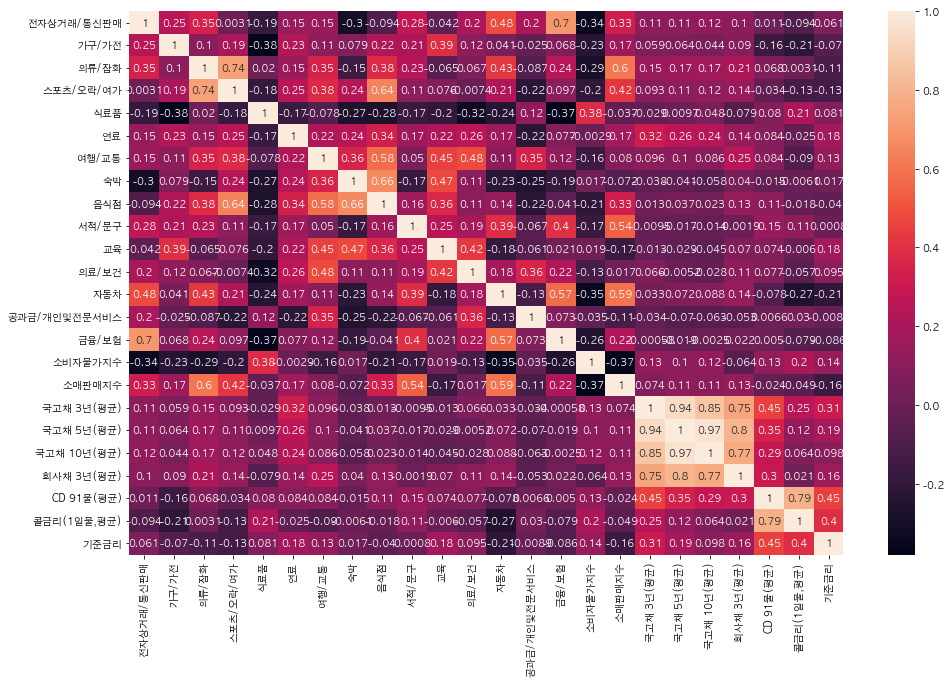

In [62]:
# 상관계수 히트맵

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(16,10))

sns.heatmap(df.corr(), annot=True)

plt.show()

### 정규성 검정

In [63]:
from scipy import stats
from scipy.stats import shapiro

# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_colus = []
    pct_colus.append([col for col in df_name])
    for i in pct_colus:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            if shapiro_test.pvalue >= 0.05:
                print(j, "의 pvalue:", shapiro_test.pvalue)
            else:
                print("탈락", j, "의 pvalue:", shapiro_test.pvalue)


In [64]:
shap_pct(df)

전자상거래/통신판매 의 pvalue: 0.5351911187171936
가구/가전 의 pvalue: 0.5509883761405945
탈락 의류/잡화 의 pvalue: 0.005598573945462704
탈락 스포츠/오락/여가 의 pvalue: 0.0009636511676944792
탈락 식료품 의 pvalue: 0.00029555990477092564
연료 의 pvalue: 0.9025336503982544
탈락 여행/교통 의 pvalue: 3.257060399164402e-08
숙박 의 pvalue: 0.3469671308994293
음식점 의 pvalue: 0.14639604091644287
탈락 서적/문구 의 pvalue: 0.0008023817790672183
탈락 교육 의 pvalue: 9.361027878185268e-06
의료/보건 의 pvalue: 0.30789488554000854
자동차 의 pvalue: 0.6040672659873962
공과금/개인및전문서비스 의 pvalue: 0.21724840998649597
금융/보험 의 pvalue: 0.5595501661300659
소비자물가지수 의 pvalue: 0.5945425629615784
소매판매지수 의 pvalue: 0.798084557056427
탈락 국고채 3년(평균) 의 pvalue: 0.0036195586435496807
탈락 국고채 5년(평균) 의 pvalue: 0.0006241943337954581
탈락 국고채 10년(평균) 의 pvalue: 0.010269096121191978
탈락 회사채 3년(평균) 의 pvalue: 4.5200235035736114e-05
탈락 CD 91물(평균) 의 pvalue: 1.322214959742496e-08
탈락 콜금리(1일물,평균) 의 pvalue: 1.2608021723002627e-13
탈락 기준금리 의 pvalue: 1.875914314348024e-18


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

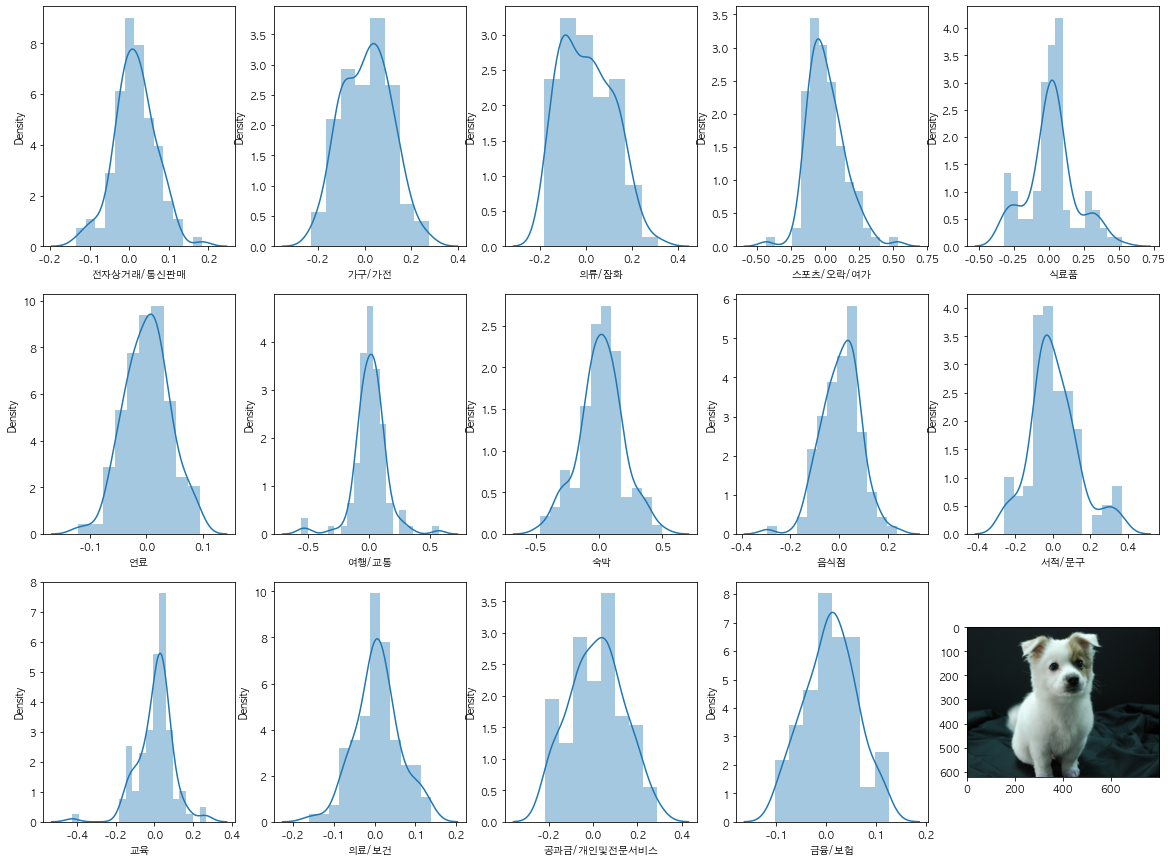

In [65]:
# 정규성 히스토그램
from matplotlib.pyplot import imread
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

image = imread('./data/바둑이.jpeg')

fig, axes = plt.subplots(3, 5)
fig.set_size_inches((20,15))

sns.distplot(df["전자상거래/통신판매"], ax=axes[0,0])
sns.distplot(df["가구/가전"], ax=axes[0,1])
sns.distplot(df["의류/잡화"], ax=axes[0,2])
sns.distplot(df["스포츠/오락/여가"], ax=axes[0,3])
sns.distplot(df["식료품"], ax=axes[0,4])
sns.distplot(df["연료"], ax=axes[1,0])
sns.distplot(df["여행/교통"], ax=axes[1,1])
sns.distplot(df["숙박"], ax=axes[1,2])
sns.distplot(df["음식점"], ax=axes[1,3])
sns.distplot(df["서적/문구"], ax=axes[1,4])
sns.distplot(df["교육"], ax=axes[2,0])
sns.distplot(df["의료/보건"], ax=axes[2,1])
sns.distplot(df["공과금/개인및전문서비스"], ax=axes[2,2])
sns.distplot(df["금융/보험"], ax=axes[2,3])
axes[2,4].imshow(image)

plt.show()

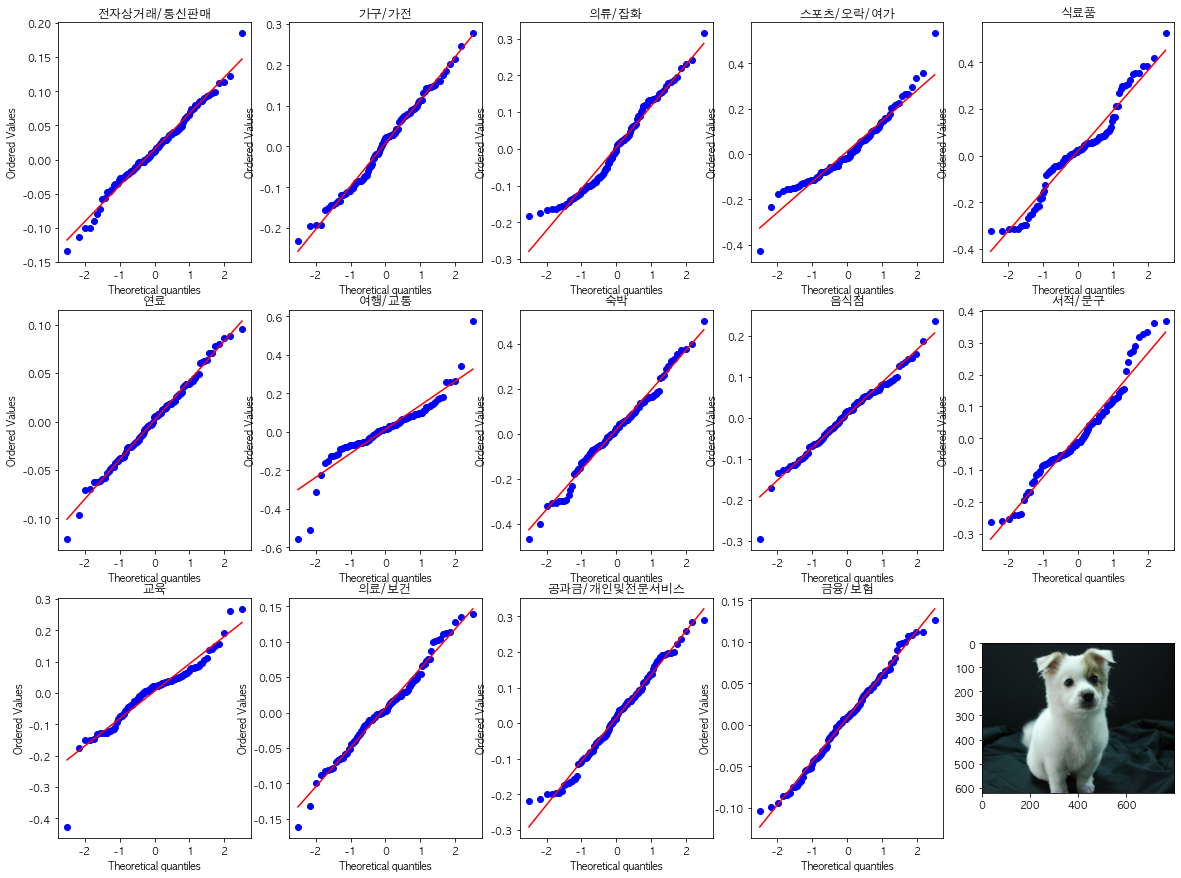

In [66]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
from matplotlib import rc 

rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False 

image = imread('./data/바둑이.jpeg')

fig, axes = plt.subplots(3, 5)
fig.set_size_inches((20,15))

stats.probplot(df["전자상거래/통신판매"], dist=stats.norm, plot=axes[0,0])
axes[0,0].title.set_text("전자상거래/통신판매")
stats.probplot(df["가구/가전"], dist=stats.norm, plot=axes[0,1])
axes[0,1].title.set_text("가구/가전")
stats.probplot(df["의류/잡화"], dist=stats.norm, plot=axes[0,2])
axes[0,2].title.set_text("의류/잡화")
stats.probplot(df["스포츠/오락/여가"], dist=stats.norm, plot=axes[0,3])
axes[0,3].title.set_text("스포츠/오락/여가")
stats.probplot(df["식료품"], dist=stats.norm, plot=axes[0,4])
axes[0,4].title.set_text("식료품")
stats.probplot(df["연료"], dist=stats.norm, plot=axes[1,0])
axes[1,0].title.set_text("연료")
stats.probplot(df["여행/교통"], dist=stats.norm, plot=axes[1,1])
axes[1,1].title.set_text("여행/교통")
stats.probplot(df["숙박"], dist=stats.norm, plot=axes[1,2])
axes[1,2].title.set_text("숙박")
stats.probplot(df["음식점"], dist=stats.norm, plot=axes[1,3])
axes[1,3].title.set_text("음식점")
stats.probplot(df["서적/문구"], dist=stats.norm, plot=axes[1,4])
axes[1,4].title.set_text("서적/문구")
stats.probplot(df["교육"], dist=stats.norm, plot=axes[2,0])
axes[2,0].title.set_text("교육")
stats.probplot(df["의료/보건"], dist=stats.norm, plot=axes[2,1])
axes[2,1].title.set_text("의료/보건")
stats.probplot(df["공과금/개인및전문서비스"], dist=stats.norm, plot=axes[2,2])
axes[2,2].title.set_text("공과금/개인및전문서비스")
stats.probplot(df["금융/보험"], dist=stats.norm, plot=axes[2,3])
axes[2,3].title.set_text("금융/보험")
axes[2,4].imshow(image)

plt.show()

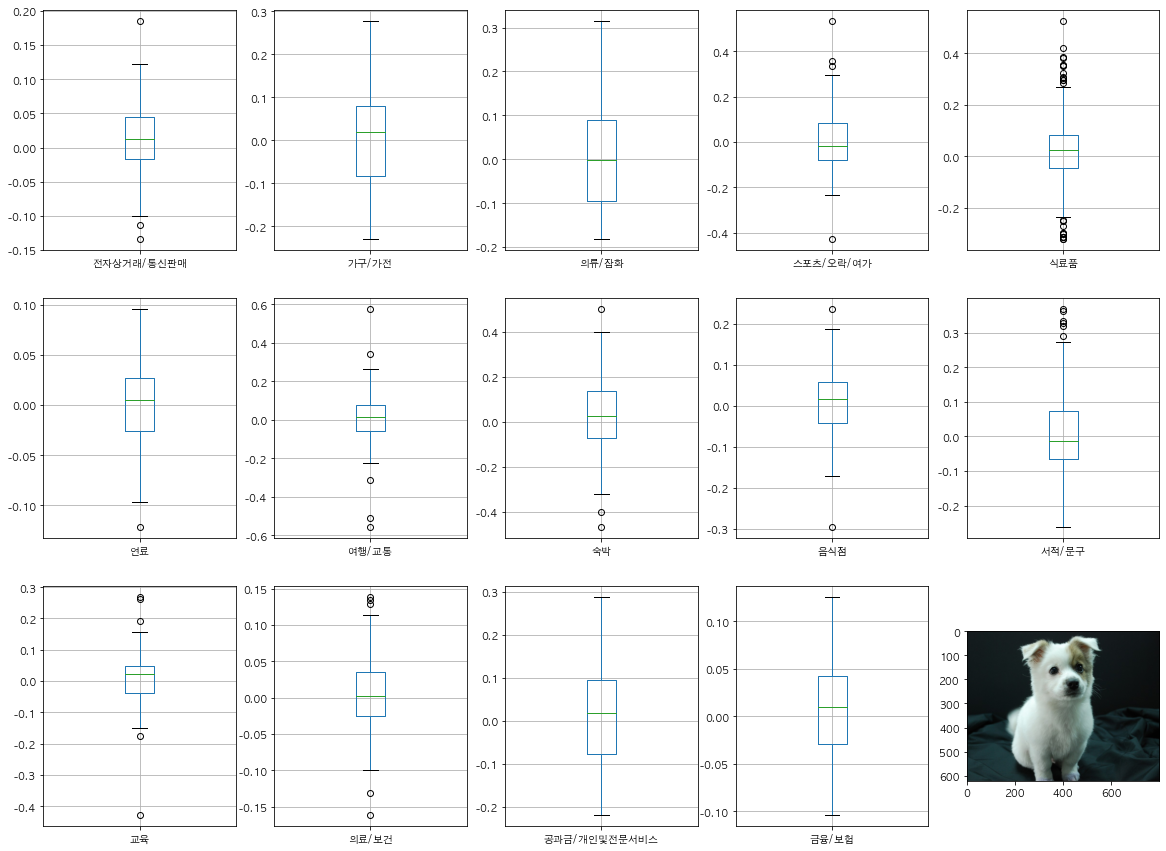

In [67]:
# 이상치 박스플롯
from matplotlib.pyplot import imread

image = imread('./data/바둑이.jpeg')

fig, axes = plt.subplots(3, 5)
fig.set_size_inches((20,15))

df.boxplot(column="전자상거래/통신판매", ax=axes[0,0])
df.boxplot(column="가구/가전", ax=axes[0,1])
df.boxplot(column="의류/잡화", ax=axes[0,2])
df.boxplot(column="스포츠/오락/여가", ax=axes[0,3])
df.boxplot(column="식료품", ax=axes[0,4])
df.boxplot(column="연료", ax=axes[1,0])
df.boxplot(column="여행/교통", ax=axes[1,1])
df.boxplot(column="숙박", ax=axes[1,2])
df.boxplot(column="음식점", ax=axes[1,3])
df.boxplot(column="서적/문구", ax=axes[1,4])
df.boxplot(column="교육", ax=axes[2,0])
df.boxplot(column="의료/보건", ax=axes[2,1])
df.boxplot(column="공과금/개인및전문서비스", ax=axes[2,2])
df.boxplot(column="금융/보험", ax=axes[2,3])
axes[2,4].imshow(image)

plt.show()

In [68]:
# csv로 저장
df.to_csv('./data/card_indexes.csv')

In [70]:
df.describe()

,전자상거래/통신판매,가구/가전,의류/잡화,스포츠/오락/여가,식료품,연료,여행/교통,숙박,음식점,서적/문구,교육,의료/보건,자동차,공과금/개인및전문서비스,금융/보험,소비자물가지수,소매판매지수,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.014688,0.007889,0.003876,0.011091,0.020965,0.001444,0.013341,0.017325,0.007424,0.008146,0.005916,0.006644,0.012458,0.014907,0.008340,0.001200,0.002279,0.000203,0.000877,0.001084,-0.000131,-0.004005,-0.004357,-0.002915
std,0.052486,0.104576,0.112911,0.136627,0.173669,0.040435,0.132813,0.175980,0.079710,0.130940,0.090351,0.055416,0.134572,0.121187,0.051849,0.003230,0.052941,0.063878,0.066094,0.064481,0.049011,0.058013,0.075330,0.089848
min,-0.134360,-0.230248,-0.182286,-0.429966,-0.321768,-0.121567,-0.557209,-0.468571,-0.295887,-0.262345,-0.427532,-0.161360,-0.355059,-0.218566,-0.103674,-0.007443,-0.125224,-0.159420,-0.154930,-0.172185,-0.105820,-0.225490,-0.314286,-0.400000
25%,-0.016489,-0.083091,-0.095054,-0.080589,-0.045709,-0.025926,-0.055344,-0.072494,-0.042142,-0.064496,-0.037920,-0.025490,-0.057675,-0.077086,-0.029473,-0.000968,-0.034296,-0.034826,-0.037838,-0.035354,-0.027149,-0.021739,-0.012987,0.000000
50%,0.011938,0.020370,-0.000553,-0.017131,0.025101,0.005019,0.014882,0.024671,0.016100,-0.012039,0.022661,0.002024,0.012870,0.017954,0.009600,0.001371,0.005858,-0.007042,-0.005319,-0.003717,-0.005405,-0.003559,0.000000,0.000000
75%,0.044053,0.080770,0.090381,0.081471,0.082126,0.026716,0.079719,0.136303,0.059139,0.072208,0.049738,0.035954,0.091750,0.094210,0.042455,0.002801,0.031833,0.023952,0.026882,0.036866,0.017544,0.000000,0.005714,0.000000
max,0.184743,0.276642,0.314217,0.532039,0.523694,0.095503,0.575989,0.499858,0.236586,0.368243,0.269034,0.138645,0.455912,0.288721,0.125671,0.010629,0.162325,0.210526,0.234043,0.231250,0.179487,0.272727,0.375000,0.500000
